In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
folder="dataset_v5/v5_2/"

In [5]:
mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2.csv', sep =",")

In [6]:
#mod_ment2.drop_duplicates(subset=['advId','resId','DepartmentId','instituteId','N_thesisId'], keep="first", inplace=True)

In [7]:
#mod_ment2.drop_duplicates(subset=['advisorId', 'researcherId'], keep='first', inplace=True)

In [8]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1'],
      dtype='object')

In [9]:
graph = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advisorId','researcherId', create_using=nx.DiGraph())

In [10]:
len(graph.nodes())

279614

In [11]:
graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','publisher_institution', create_using=nx.DiGraph())

In [12]:
len(graph1.nodes())

259454

In [13]:
components = list(nx.weakly_connected_components(graph))

In [14]:
components1 = list(nx.weakly_connected_components(graph1))

In [15]:
components.sort(key=len, reverse=True)

In [16]:
components1.sort(key=len, reverse=True)

In [17]:
len(components)

79985

In [18]:
len(components[0])

863

In [19]:
len(components1)

59583

In [20]:
len(components1[0])

632

In [21]:
comp_len=[len(c) for c in components1]

In [22]:
comp_size_dist=Counter(comp_len)

In [23]:
comp_size_dist

Counter({632: 1,
         380: 1,
         366: 1,
         360: 1,
         324: 1,
         310: 1,
         276: 1,
         273: 1,
         265: 1,
         254: 1,
         251: 1,
         245: 1,
         239: 1,
         233: 1,
         228: 1,
         227: 1,
         203: 2,
         195: 1,
         191: 1,
         183: 1,
         182: 1,
         181: 1,
         177: 1,
         175: 2,
         172: 1,
         169: 1,
         168: 1,
         167: 1,
         161: 1,
         160: 2,
         158: 2,
         150: 1,
         147: 1,
         144: 1,
         143: 1,
         142: 1,
         140: 1,
         138: 1,
         136: 1,
         134: 2,
         132: 3,
         131: 1,
         129: 1,
         128: 2,
         126: 3,
         125: 1,
         124: 1,
         123: 2,
         122: 2,
         118: 1,
         117: 2,
         116: 2,
         115: 1,
         112: 3,
         111: 2,
         110: 1,
         109: 1,
         108: 1,
         107: 

In [24]:
in_dgr = graph1.in_degree()

In [25]:
in_dgr = dict(in_dgr)

In [26]:
sorted_in_dgr = dict(sorted(in_dgr.items(), key=lambda item: item[1],reverse=True))

In [27]:
sorted_in_dgr

{97751: 6,
 97678: 4,
 97781: 4,
 97827: 4,
 97753: 4,
 98522: 4,
 98504: 4,
 101115: 4,
 101133: 4,
 103862: 4,
 119746: 4,
 129872: 4,
 27402: 4,
 282488: 4,
 232034: 4,
 156726: 4,
 179922: 4,
 213379: 4,
 213389: 4,
 94767: 3,
 94950: 3,
 96872: 3,
 97507: 3,
 97509: 3,
 97513: 3,
 97662: 3,
 97758: 3,
 97665: 3,
 97757: 3,
 97761: 3,
 97809: 3,
 97709: 3,
 97762: 3,
 97692: 3,
 97892: 3,
 97896: 3,
 98019: 3,
 97689: 3,
 97706: 3,
 97752: 3,
 98512: 3,
 98513: 3,
 98501: 3,
 98534: 3,
 101117: 3,
 101120: 3,
 103552: 3,
 104971: 3,
 105877: 3,
 106835: 3,
 106834: 3,
 282026: 3,
 107803: 3,
 108259: 3,
 108693: 3,
 114803: 3,
 117552: 3,
 117629: 3,
 118926: 3,
 118928: 3,
 200223: 3,
 119730: 3,
 12892: 3,
 119724: 3,
 119769: 3,
 119744: 3,
 120069: 3,
 120055: 3,
 123139: 3,
 127338: 3,
 127590: 3,
 127598: 3,
 127643: 3,
 127796: 3,
 128591: 3,
 186838: 3,
 129494: 3,
 129497: 3,
 156705: 3,
 241959: 3,
 129501: 3,
 129502: 3,
 129511: 3,
 129512: 3,
 129514: 3,
 129513: 3,
 2

In [28]:
in_dgr_val = in_dgr.values()

In [29]:
in_dgr_dist = Counter(in_dgr_val)

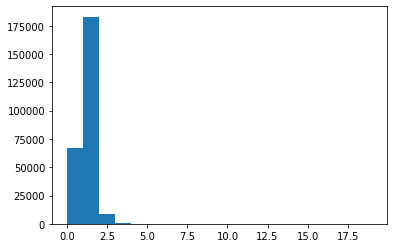

In [30]:
plt.hist(in_dgr_val, bins=np.arange(0,20,1))
plt.show()

In [31]:
in_dgr_dist #indgree, no.nodes

Counter({1: 182968, 0: 67395, 2: 8786, 3: 286, 4: 18, 6: 1})

In [32]:
#list(sorted_fecundity.keys())[-5:]

In [33]:
#ment[ment['advId_1']==75844]

In [32]:
out_dgr = graph1.out_degree()

In [33]:
out_dgr = dict(out_dgr)

In [34]:
sorted_out_dgr = dict(sorted(out_dgr.items(), key=lambda item: item[1],reverse=True))

In [35]:
sorted_out_dgr

{144109: 128,
 88147: 66,
 30812: 61,
 88166: 59,
 26894: 58,
 2013: 55,
 48103: 55,
 79607: 52,
 89320: 51,
 65544: 50,
 153: 48,
 82909: 48,
 21670: 47,
 83523: 47,
 67666: 46,
 53252: 44,
 1556: 43,
 2952: 43,
 58479: 43,
 65407: 43,
 81720: 43,
 4746: 42,
 15429: 42,
 104127: 41,
 30646: 41,
 53108: 41,
 65515: 41,
 90436: 41,
 4271: 40,
 63216: 40,
 28440: 39,
 79608: 39,
 81731: 39,
 45604: 38,
 67153: 38,
 72163: 38,
 85848: 38,
 2127: 37,
 22427: 37,
 52342: 37,
 68259: 37,
 235357: 36,
 36120: 36,
 45605: 36,
 72156: 36,
 11107: 35,
 21692: 35,
 41813: 35,
 58476: 35,
 71911: 35,
 88788: 35,
 17923: 34,
 4744: 34,
 6974: 34,
 26589: 34,
 45451: 34,
 46617: 34,
 51360: 34,
 53615: 34,
 81724: 34,
 83320: 34,
 4752: 33,
 30321: 33,
 34141: 33,
 37176: 33,
 37397: 33,
 45595: 33,
 65455: 33,
 68266: 33,
 69133: 33,
 76069: 33,
 81443: 33,
 88337: 33,
 88539: 33,
 92802: 33,
 852: 32,
 6274: 32,
 12387: 32,
 17155: 32,
 21545: 32,
 22565: 32,
 24275: 32,
 34197: 32,
 65457: 32,
 6

In [36]:
out_dgr_val = out_dgr.values()

In [37]:
out_dgr_dist = Counter(out_dgr_val)

In [38]:
deg, cnt = zip(*out_dgr_dist.items())

In [39]:
out_dgr_dist #out Degree, Number of node

Counter({2: 12489,
         15: 203,
         0: 183166,
         1: 42349,
         5: 2640,
         3: 6610,
         8: 1047,
         6: 1908,
         10: 598,
         4: 3876,
         7: 1339,
         11: 461,
         9: 749,
         25: 30,
         14: 272,
         12: 395,
         21: 76,
         34: 10,
         48: 2,
         27: 31,
         23: 53,
         31: 16,
         24: 25,
         18: 107,
         20: 81,
         13: 295,
         36: 4,
         28: 22,
         32: 12,
         17: 135,
         41: 5,
         19: 97,
         26: 38,
         43: 5,
         22: 55,
         55: 2,
         37: 4,
         29: 22,
         16: 168,
         40: 2,
         42: 2,
         33: 14,
         30: 14,
         35: 6,
         47: 2,
         128: 1,
         58: 1,
         39: 3,
         61: 1,
         38: 4,
         44: 1,
         50: 1,
         46: 1,
         52: 1,
         66: 1,
         59: 1,
         51: 1})

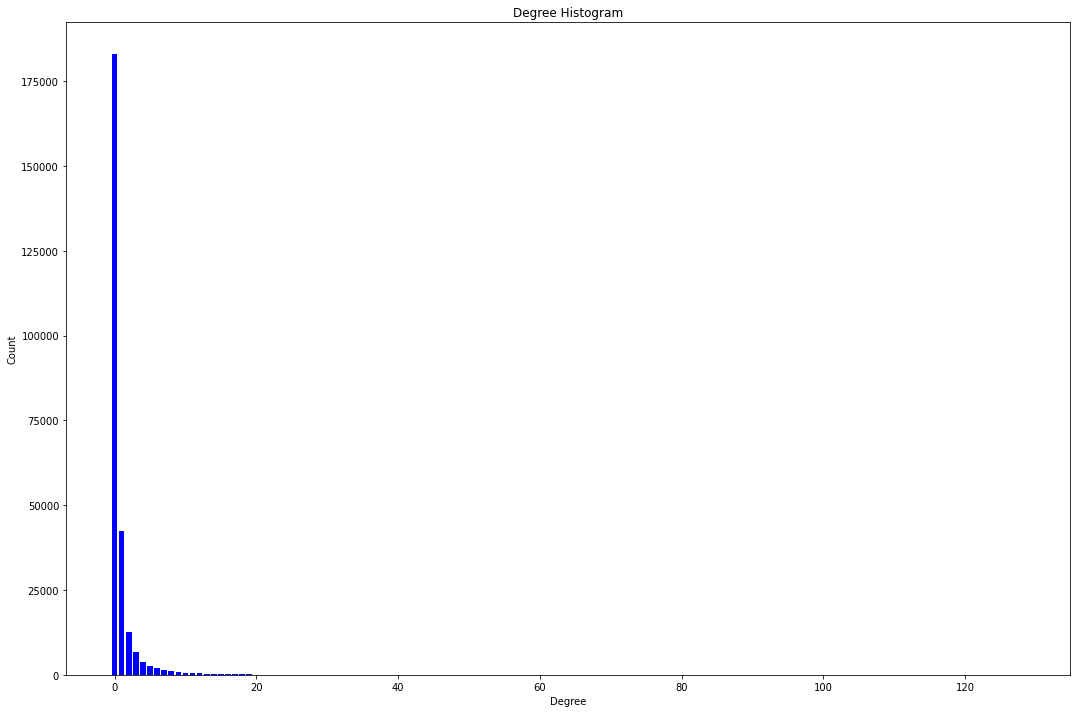

In [40]:
fig, ax = plt.subplots(figsize=(18,12))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

<h2>ANCESTORS, DESCENDANTS</h2>

In [41]:
len(nx.descendants(graph1,144109.0))  #60040.0 ---problem check

219

In [42]:
len(nx.ancestors(graph1,144109.0))

1

In [43]:
mod_ment2.columns   

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1'],
      dtype='object')

In [46]:
mod_ment2[(mod_ment2["advId"]==144109.0)]#.shape#['publisher_dept'].value_counts()#['dc.date.submitted[]'])#

advisorId  researcherId   advId   resId advisor_name  \
66636       30037        153804  144109  153804    Mohan, S.   
115601      53425         53418  144109   53418    Mohan, S.   
115602      53425         53443  144109   53443    Mohan, S.   
115603      53425         53445  144109   53445    Mohan, S.   
115604      53425         53465  144109   53465    Mohan, S.   
...           ...           ...     ...     ...          ...   
115723      53425        199685  144109  199685    Mohan, S.   
115724      53425        199688  144109  199688    Mohan, S.   
115880      53474        199651  144109  199651     S, Mohan   
115882      53476        199652  144109  199652     Mohan S.   
148555      69131        230550  144109  230550    Mohan, S.   

            researcher_name                                 publisher_dept  \
66636        RAJ, R.SENTHIL            department of engineering education   
115601      Savadamuthu, T.                        department of education   
115602  Lokanadha Reddy, G.                        department of education   
115603       Dhandapani, R.                        department of education   
115604  Balasubramanian, R.                        department of education   
...                     ...                                            ...   
115723          Brindha, S.                        department of education   
115724            Deepa, S.                        department of education   
115880            P, Rosari                        department of education   
115882            Abraham Y                        department of education   
148555           Priya, MRC  department of economics and rural development   

       DepartmentId publisher_institution instituteId  \
66636          D925  University of Madras        I364   
115601        D1963   Alagappa University        I333   
115602        D1963   Alagappa University        I333   
115603        D1963   Alagappa University        I333   
115604        D1963   Alagappa University        I333   
...             ...                   ...         ...   
115723        D1963   Alagappa University        I333   
115724        D1963   Alagappa University        I333   
115880        D1963   Alagappa University        I333   
115882        D1963   Alagappa University        I333   
148555        D1597   Alagappa University        I333   

                                                    title thesisId N_thesisId  \
66636   Design and Evaluation of Induction Training Pr...  T143567    T143567   
115601  Teacher morale and student morale at secondary...   T15017     T15017   
115602     Role_performance of special education teachers   T77128     T77128   
115603  Unitary University educational management_a su...   T47926     T47926   
115604  Effect of cognitive modeling on learning mathe...   T73241     T73241   
...                                                   ...      ...        ...   
115723  Motivated self regulated learning and academic...  T162040    T162040   
115724  Influence of remedial techniques on improving ...   T37192     T37192   
115880  Availability accessibility and assurance of qu...   T85519     T85519   
115882  Emotional intelligence, self esteem and academ...   T18241     T18241   
148555  Teacher effectiveness of postgraduate teachers...   T19876     T19876   

       date_submitted dc.date.awarded                       dc.subject.ddc  \
66636      2014-11-23      2014-11-23  300::Social sciences|370::Education   
115601     1992-01-01             NaN  300::Social sciences|370::Education   
115602     2000-01-01             NaN  300::Social sciences|370::Education   
115603     2002-01-01             NaN  300::Social sciences|370::Education   
115604     1997-01-01             NaN  300::Social sciences|370::Education   
...               ...             ...                                  ...   
115723     2010-12-30      2012-04-27  300::Social sciences|370::Education   
115724     2011-08-0

In [76]:
#mod_ment2[(mod_ment2["advisorId"]==139316.0) & (mod_ment2["dc.subject.ddc"]=="Natural sciences & mathematics,Chemistry & allied sciences")]

In [44]:
mod_ment2[(mod_ment2['advisor_name']=='Sharma, A. K.') & (mod_ment2['publisher_institution']=="University of Calcutta") ]#['publisher_institution'].value_counts()

advisorId  researcherId  advId   resId   advisor_name  \
47949      21291        136478  21291  136478  Sharma, A. K.   
48769      21670         21700  21670   21700  Sharma, A. K.   
48770      21670         21709  21670   21706  Sharma, A. K.   
48771      21670         21712  21670   21712  Sharma, A. K.   
48772      21670         21720  21670   21720  Sharma, A. K.   
48773      21670         21762  21670   21762  Sharma, A. K.   
48774      21670         21766  21670   21707  Sharma, A. K.   
48775      21670        137211  21670  137211  Sharma, A. K.   
48776      21670        137233  21670  137233  Sharma, A. K.   
48777      21670        137235  21670  137235  Sharma, A. K.   
48778      21670        137236  21670  137236  Sharma, A. K.   
48779      21670        137245  21670  137245  Sharma, A. K.   
48780      21670        137251  21670  137251  Sharma, A. K.   
48781      21670        137328  21670  137328  Sharma, A. K.   
48782      21670        137341  21670  137341  Sharma, A. K.   
48783      21670        137346  21670  137346  Sharma, A. K.   
48784      21670        137347  21670  137347  Sharma, A. K.   
48785      21670        137348  21670  137348  Sharma, A. K.   
48786      21670        137349  21670  137349  Sharma, A. K.   
48787      21670        137351  21670  137351  Sharma, A. K.   
48788      21670        137354  21670  137354  Sharma, A. K.   
48789      21670        137360  21670  137360  Sharma, A. K.   
48790      21670        137362  21670  137362  Sharma, A. K.   
48791      21670        137373  21670  137373  Sharma, A. K.   
48792      21670        137404  21670  137404  Sharma, A. K.   
48793      21670        137405  21670  137405  Sharma, A. K.   
48794      21670        137483  21670  137483  Sharma, A. K.   
48795      21670        137494  21670  137494  Sharma, A. K.   
48796      21670        137556  21670  137556  Sharma, A. K.   
48797      21670        137558  21670  137558  Sharma, A. K.   
48798      21670        137564  21670  137564  Sharma, A. K.   
48799      21670        137568  21670  137568  Sharma, A. K.   
48800      21670        137570  21670  137570  Sharma, A. K.   
48801      21670        137572  21670  137572  Sharma, A. K.   
48802      21670        137574  21670  137574  Sharma, A. K.   
48803      21670        137578  21670  137578  Sharma, A. K.   
48804      21670        137582  21670  137582  Sharma, A. K.   
48805      21670        137585  21670  137585  Sharma, A. K.   
48806      21670        137594  21670  137594  Sharma, A. K.   
48807      21670        137596  21670  137596  Sharma, A. K.   
48808      21670        137618  21670  137618  Sharma, A. K.   
48809      21670        137622  21670  137622  Sharma, A. K.   
48810      21670        137638  21670  137638  Sharma, A. K.   
48811      21670        137718  21670  137718  Sharma, A. K.   
51910      22853        139587  22853  139587  Sharma, A. K.   
57517      25556        145492  25556  145492  Sharma, A. K.   

                      researcher_name                        publisher_dept  \
47949                   Dana, Sukumar             department of agriculture   
48769            Roy, Satyesh Chandra                  department of botany   
48770            Mukhopadhyay, Sandip                  department of botany   
48771                   Ghosh, Sibdas                  department of botany   
48772          Chatterjee, Amiyangshu                  department of botany   
48773                      Pal, Amita                  department of botany   
48774          Chaudhuri, Rajat Kanti                  department of botany   
48775            Ghosh, Parthasarathi                  department of botany   
48776              Banerjee, Minakshi                  department of botany   
48777                 Chaudhuri, A B.                  department of botany   
48778                  Hore, Anuradha                  department of botany   
48779                    Guha, Suhita             

In [44]:
#mod_ment2[(mod_ment2["resId"]==18925.0)]

In [44]:
sorted_in_dgr

{97751: 6,
 97678: 4,
 97781: 4,
 97827: 4,
 97753: 4,
 98522: 4,
 98504: 4,
 101115: 4,
 101133: 4,
 103862: 4,
 119746: 4,
 129872: 4,
 27402: 4,
 282488: 4,
 232034: 4,
 156726: 4,
 179922: 4,
 213379: 4,
 213389: 4,
 94767: 3,
 94950: 3,
 96872: 3,
 97507: 3,
 97509: 3,
 97513: 3,
 97662: 3,
 97758: 3,
 97665: 3,
 97757: 3,
 97761: 3,
 97809: 3,
 97709: 3,
 97762: 3,
 97692: 3,
 97892: 3,
 97896: 3,
 98019: 3,
 97689: 3,
 97706: 3,
 97752: 3,
 98512: 3,
 98513: 3,
 98501: 3,
 98534: 3,
 101117: 3,
 101120: 3,
 103552: 3,
 104971: 3,
 105877: 3,
 106835: 3,
 106834: 3,
 282026: 3,
 107803: 3,
 108259: 3,
 108693: 3,
 114803: 3,
 117552: 3,
 117629: 3,
 118926: 3,
 118928: 3,
 200223: 3,
 119730: 3,
 12892: 3,
 119724: 3,
 119769: 3,
 119744: 3,
 120069: 3,
 120055: 3,
 123139: 3,
 127338: 3,
 127590: 3,
 127598: 3,
 127643: 3,
 127796: 3,
 128591: 3,
 186838: 3,
 129494: 3,
 129497: 3,
 156705: 3,
 241959: 3,
 129501: 3,
 129502: 3,
 129511: 3,
 129512: 3,
 129514: 3,
 129513: 3,
 2

In [117]:
mod_ment2[(mod_ment2["resId"]==5703.0)][['advId','advisor_name','researcher_name','title',"N_thesisId",'date_submitted']]

advId    advisor_name researcher_name  \
13714   5694  Khan, Abrar M.   Alam, Mansoor   
13758   5724  Husain, Akhtar   Alam, Mansoor   

                                                   title N_thesisId  \
13714  Studies on leaf blight disease of Citronella j...    T119519   
13758  Studies on leaf blight disease of Citronella j...    T119519   

      date_submitted  
13714     1979-01-01  
13758     1979-01-01

In [ ]:
#197064 rare case

In [57]:
mod_ment2[(mod_ment2["resId"]==103862.0)][['advisor_name','researcher_name','title','resId',"advId","N_thesisId",'date_submitted','DepartmentId','instituteId','dc.date.awarded']]

advisor_name    researcher_name  \
11586  Kesambi, D. D.  Mohammad, Shabbar   
11587  Siddiqi, M. R.  Mohammad, Shabbar   
11588      Racine, C.  Mohammad, Shabbar   
11591  Kosambi, D. D.  Shabbar, Mohammad   

                                                   title   resId  advId  \
11586  On the study of the lorentz invariant spaces_2...  103862   4912   
11587  On the study of the lorentz invariant spaces_2...  103862   4913   
11588  On the study of the lorentz invariant spaces_2...  103862   4914   
11591  On the geometry of the spaces of Riemann const...  103862   4917   

      N_thesisId date_submitted DepartmentId instituteId dc.date.awarded  
11586    T141160     1943-01-01         D563        I292             NaN  
11587    T141160     1943-01-01         D563        I292             NaN  
11588    T141160     1943-01-01         D563        I292             NaN  
11591    T141160     1943-01-01         D563        I292             NaN

In [69]:
mod_ment2[mod_ment2['advisor_name']=="Bhattacharjee, Tapodhir"].groupby(['publisher_institution','publisher_dept'])['publisher_dept'].agg("count")

publisher_institution  publisher_dept         
Assam University       department of bengali      60
                       department of education     1
Name: publisher_dept, dtype: int64

In [48]:
mod_ment2[mod_ment2['researcher_name'].str.contains(r"Arora,?\s?[rR]")]['researcher_name'].values#['dc.subject.ddc'].values

array(['Arora, Ritu', 'Arora, Renu', 'Arora, Raj Kumar', 'Arora, Ranjan',
       'Arora, Ramesh Kanta', 'Arora, Renu', 'Arora, Richa',
       'Arora, Rinku', 'Arora, Rajneesh', 'Arora, Rajesh', 'Arora, Rohit',
       'Arora, Ritu', 'Arora, Reetakshi', 'Arora, Rohit',
       'Arora, Ram Tikaya', 'Arora, Rashmi', 'Arora, Renu',
       'Arora, Rashmi', 'Arora, Renu', 'Arora, Ravender Kumar',
       'Arora, Rajeshwar Kumar', 'Arora, Ritu', 'Arora, Rajneesh',
       'Arora, Rachna'], dtype=object)

In [128]:
mod_ment2[(mod_ment2["advisorId"]==64890.0)]

advisorId  researcherId  advId   resId advisor_name researcher_name  \
137891      64890        220572  64890  220572  Parvati, K.     Naik, Anima   

                                     publisher_dept DepartmentId  \
137891  department of computer sc. and enggineering        D2309   

                                    publisher_institution instituteId  \
137891  Centurion University of Technology and Management        I145   

                                                    title thesisId N_thesisId  \
137891  A comparative study of population based algori...   T80697     T80697   

       date_submitted dc.date.awarded                       dc.subject.ddc  \
137891     2014-09-07      2015-07-15  500::Natural sciences & mathematics   

       uniq_ddc_across_dept dc.description.abstract dc.title.alternative  \
137891             ('500',)                     NaN                  NaN   

       N_DepartmentId_1  
137891            D1042

In [50]:
#mod_ment1[mod_ment1["studId_1"]==130058]['publisher_institution'].value_counts()

In [51]:
#mod_ment2[mod_ment2["dc.subject.ddc"]=='Not_Applicable']

<h2>Graph Plot </h2>

In [129]:
cc_graph =graph1.subgraph(components1[50])

In [130]:
len(components1[50])

126

In [53]:
#components1[567]

In [54]:
#pos1 = nx.spring_layout(cc_graph)

In [131]:
pos = nx.random_layout(cc_graph)

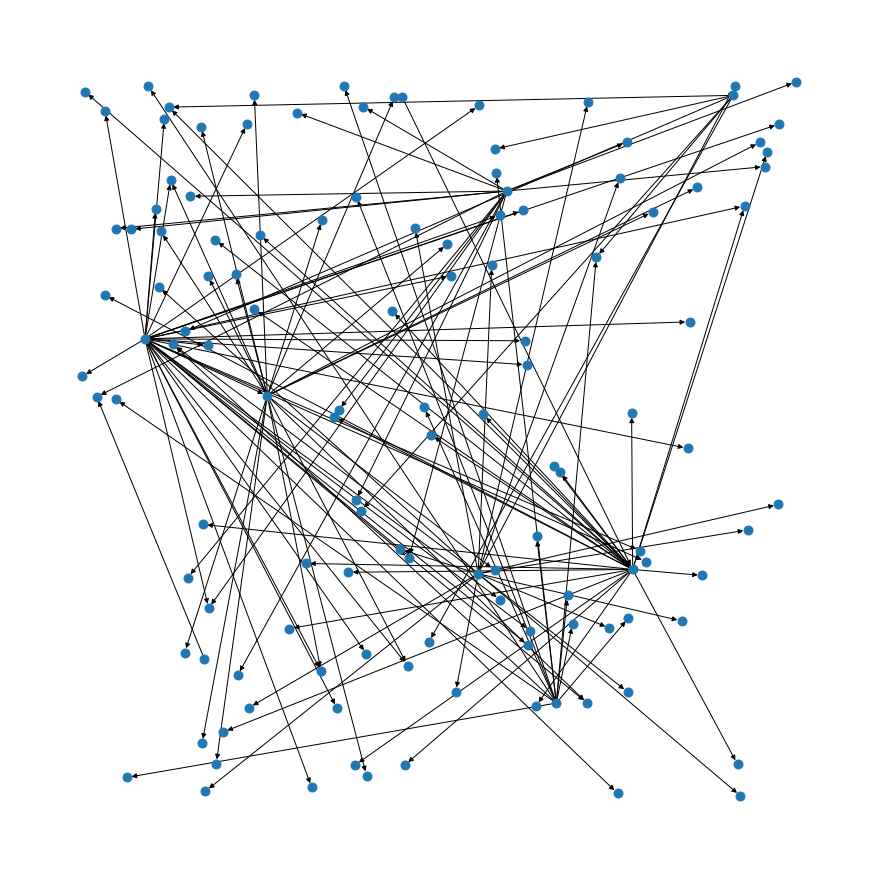

In [132]:
plt.figure(figsize=(12,12)) 
nx.draw(cc_graph,pos, node_size=80,font_size=8)#with_labels=True)
plt.show()

In [57]:
#mod_ment2[mod_ment2['researcher_name'].duplicated()]

In [58]:
mod_ment2[mod_ment2['researcher_name']=='Geetha, N.']

advisorId  researcherId           advisor_name researcher_name  \
15784        7331        110082             Renuga, P.      Geetha, N.   
90237       44483        180298   Shanmugasundaram, S.      Geetha, N.   
98748       48080        187782  Manavalaramanujam, R.      Geetha, N.   
126165      61619        227375             Rao, G. R.      Geetha, N.   
129977      63163        217109               Jeya, V.      Geetha, N.   
161797      77551        247511          Duraisamy, P.      Geetha, N.   
200060      95325        283914          Jeeva, Mrs M.      Geetha, N.   

       dc.date.submitted[] dc.language.iso[]  \
15784           2015-01-01               eng   
90237           2007-03-12               eng   
98748           2001-05-31               eng   
126165          1994-01-01               eng   
129977          2007-02-28               tam   
161797          2002-01-09               eng   
200060          2014-05-01               eng   

                           publisher_dept DepartmentId  \
15784   faculty of electrical engineering        D2134   
90237              department of commerce        D1072   
98748               department of zoology        D1572   
126165               department of botany        D2461   
129977                department of tamil         D355   
161797         department of econometrics         D182   
200060          department of mathematics         D563   

              publisher_institution instituteId  ...  \
15784               Anna University        I250  ...   
90237            Periyar University        I348  ...   
98748         Bharathiar University        I253  ...   
126165     Bharathidasan University        I103  ...   
129977        Bharathiar University        I253  ...   
161797         University of Madras        I364  ...   
200060  B S Abdur Rahman University         I34  ...   

                                  dc.description.abstract  \
15784                                                 NaN   
90237                                                 NaN   
98748                                                 NaN   
126165                                                NaN   
129977                                                NaN   
161797  Wage differentials and discrimination by gende...   
200060                                                NaN   

       dc.title.alternative                 advisor_inst_dept  \
15784                   NaN             Renuga, P.@I250@D2134   
90237                   NaN   Shanmugasundaram, S.@I348@D1072   
98748                   NaN  Manavalaramanujam, R.@I253@D1572   
126165                  NaN             Rao, G. R.@I103@D2461   
129977                  NaN                Jeya, V.@I253@D355   
161797                  NaN           Duraisamy, P.@I364@D182   
200060                  NaN            Jeeva, Mrs M.@I34@D563   

               stud_inst_dept                adv_names_rid      res_names_rid  \
15784   Geetha, N.@I250@D2134              Renuga, P.@7331  Geetha, N.@110082   
90237   Geetha, N.@I348@D1072   Shanmugasundaram, S.@44483  Geetha, N.@180298   
98748   Geetha, N.@I253@D1572  Manavalaramanujam, R.@48080  Geetha, N.@187782   
126165  Geetha, N.@I103@D2461             Rao, G. R.@61619  Geetha, N.@227375   
129977   Geetha, N.@I253@D355               Jeya, V.@63163  Geetha, N.@217109   
161797   Geetha, N.@I364@D182          Duraisamy, P.@77551  Geetha, N.@247511   
200060    Geetha, N.@I34@D563          Jeeva, Mrs M.@95325  Geetha, N.@283914   

        advId   resId N_DepartmentId N_thesisId  
15784    7331  110082          D2134     T81255  
90237   44483  227942          D1072      T5842  
98748   48080  187782          D1572     T34304  
126165  61619  227375          D2461    T179994  
129977  63163  217109           D355     T43493  
161797  77551  247511           D182     T10336  
200060  95325  283914           D563     T24076  

[7 rows x 26 columns]

In [59]:
sorted_in_dgr

{98776: 6,
 218930: 5,
 284078: 4,
 98852: 4,
 98778: 4,
 99516: 4,
 118541: 4,
 127415: 4,
 151403: 4,
 171627: 4,
 207102: 4,
 263009: 4,
 96056: 3,
 97995: 3,
 98532: 3,
 98536: 3,
 98783: 3,
 98782: 3,
 98786: 3,
 98834: 3,
 98734: 3,
 98731: 3,
 98921: 3,
 99044: 3,
 98777: 3,
 99524: 3,
 99525: 3,
 99513: 3,
 99534: 3,
 99546: 3,
 106270: 3,
 284262: 3,
 106279: 3,
 115444: 3,
 117235: 3,
 117243: 3,
 117741: 3,
 118525: 3,
 11586: 3,
 118519: 3,
 118564: 3,
 118539: 3,
 124984: 3,
 125442: 3,
 127045: 3,
 127048: 3,
 127052: 3,
 127053: 3,
 127061: 3,
 127062: 3,
 127064: 3,
 127063: 3,
 127838: 3,
 127855: 3,
 129669: 3,
 141073: 3,
 142858: 3,
 143248: 3,
 143293: 3,
 143319: 3,
 143255: 3,
 143264: 3,
 143249: 3,
 143312: 3,
 143317: 3,
 24182: 3,
 145376: 3,
 149821: 3,
 151382: 3,
 151385: 3,
 155720: 3,
 155809: 3,
 223570: 3,
 156293: 3,
 156305: 3,
 158252: 3,
 158866: 3,
 158867: 3,
 158997: 3,
 158998: 3,
 159506: 3,
 159528: 3,
 159552: 3,
 33859: 3,
 166488: 3,
 1667

In [90]:
mod_ment2[mod_ment2['resId']==98776]#['dc.title[]'].value_counts()

advisorId  researcherId       advisor_name  researcher_name  \
3702       1790         98776      Agarwal, Usha  Gupta, Priyanka   
3728       1793         98776      Arora, Sunita  Gupta, Priyanka   
3790       1808         98776    Kapoor, Mridula  Gupta, Priyanka   
3794       1809         98776     Sharma, Sanjay  Gupta, Priyanka   
3796       1810         98776  Kharkwal, Sushila  Gupta, Priyanka   
3798       1811         98776      Mathur, B. D.  Gupta, Priyanka   

     dc.date.submitted[] dc.language.iso[]  \
3702          2003-01-01               eng   
3728          2003-01-01               eng   
3790          2003-01-01               eng   
3794          2003-01-01               eng   
3796          2003-01-01               eng   
3798          2003-01-01               eng   

                                        publisher_dept DepartmentId  \
3702  department of maharani laxmi bai medical college         D156   
3728  department of maharani laxmi bai medical college         D156   
3790  department of maharani laxmi bai medical college         D156   
3794  department of maharani laxmi bai medical college         D156   
3796  department of maharani laxmi bai medical college         D156   
3798  department of maharani laxmi bai medical college         D156   

       publisher_institution instituteId  ... dc.description.abstract  \
3702  Bundelkhand University        I224  ...                     NaN   
3728  Bundelkhand University        I224  ...                     NaN   
3790  Bundelkhand University        I224  ...                     NaN   
3794  Bundelkhand University        I224  ...                     NaN   
3796  Bundelkhand University        I224  ...                     NaN   
3798  Bundelkhand University        I224  ...                     NaN   

     dc.title.alternative            advisor_inst_dept  \
3702                  NaN      Agarwal, Usha@I224@D156   
3728                  NaN      Arora, Sunita@I224@D156   
3790                  NaN    Kapoor, Mridula@I224@D156   
3794                  NaN     Sharma, Sanjay@I224@D156   
3796                  NaN  Kharkwal, Sushila@I224@D156   
3798                  NaN      Mathur, B. D.@I224@D156   

                 stud_inst_dept           adv_names_rid  \
3702  Gupta, Priyanka@I224@D156      Agarwal, Usha@1790   
3728  Gupta, Priyanka@I224@D156      Arora, Sunita@1793   
3790  Gupta, Priyanka@I224@D156    Kapoor, Mridula@1808   
3794  Gupta, Priyanka@I224@D156     Sharma, Sanjay@1809   
3796  Gupta, Priyanka@I224@D156  Kharkwal, Sushila@1810   
3798  Gupta, Priyanka@I224@D156      Mathur, B. D.@1811   

              res_names_rid advId  resId N_DepartmentId N_thesisId  
3702  Gupta, Priyanka@98776  1790  98776           D156     T48465  
3728  Gupta, Priyanka@98776  1793  98776           D156     T48465  
3790  Gupta, Priyanka@98776  1808  98776           D156     T48465  
3794  Gupta, Priyanka@98776  1809  98776           D156     T48465  
3796  Gupta, Priyanka@98776  1810  98776           D156     T48465  
3798  Gupta, Priyanka@98776  1811  98776           D156     T48465  

[6 rows x 26 columns]

In [62]:
mod_ment2[mod_ment2['researcherId']==99846]

advisorId  researcherId           advisor_name   researcher_name  \
4766       2260         99846    Rao, L. Jagan Mohan  Dhanalakshmi, K.   
4767       2261         99846  Bhattacharya, Suvendu  Dhanalakshmi, K.   

     dc.date.submitted[] dc.language.iso[]  \
4766          2012-01-01               eng   
4767          2012-01-01               eng   

                          publisher_dept DepartmentId publisher_institution  \
4766  department of studies in chemistry        D1331  University of Mysore   
4767  department of studies in chemistry        D1331  University of Mysore   

     instituteId  ... dc.description.abstract dc.title.alternative  \
4766         I40  ...                     NaN                  NaN   
4767         I40  ...                     NaN                  NaN   

                    advisor_inst_dept              stud_inst_dept  \
4766    Rao, L. Jagan Mohan@I40@D1331  Dhanalakshmi, K.@I40@D1331   
4767  Bhattacharya, Suvendu@I40@D1331  Dhanalakshmi, K.@I40@D1331   

                   adv_names_rid           res_names_rid advId  resId  \
4766    Rao, L. Jagan Mohan@2260  Dhanalakshmi, K.@99846  2260  99846   
4767  Bhattacharya, Suvendu@2261  Dhanalakshmi, K.@99846  2261  99846   

     N_DepartmentId N_thesisId  
4766          D1331    T101798  
4767          D1331    T101798  

[2 rows x 26 columns]

In [74]:
mod_ment2[mod_ment2['advId']==1770]#['dc.title[]']

advisorId  researcherId   advisor_name        researcher_name  \
3514       1770         98708  Dabral, P. K.           Alok, Johri.   
3515       1770         98728  Dabral, P. K.    Agarwal, Anil Kumar   
3516       1770         98766  Dabral, P. K.  Dubey, Virendra Kumar   
3517       1770         98886  Dabral, P. K.      Singh, Upendrapal   
3518       1770         98888  Dabral, P. K.            Lal, Murari   
3519       1770         98896  Dabral, P. K.              Raj, Prem   
3520       1770         98898  Dabral, P. K.        Kumar, Avadhesh   
3522       1770         98931  Dabral, P. K.          Prakash, Sant   
3523       1770         98963  Dabral, P. K.   Sharma, Gyan Prakash   
3524       1770         98995  Dabral, P. K.              Ajaykumar   
3525       1770         98996  Dabral, P. K.        Agarwal, Rajesh   
3526       1770         99027  Dabral, P. K.             Kumar, Raj   
3527       1770         99030  Dabral, P. K.            Singh, M P.   
3528       1770         99049  Dabral, P. K.         Luthara, Manav   
3529       1770         99051  Dabral, P. K.   Mishra, Kaushal kant   
3530       1770         99052  Dabral, P. K.           Gupta, Sunil   
3531       1770         99053  Dabral, P. K.          Pagrani, Vnod   
3532       1770         99054  Dabral, P. K.   Jaitly, Rajesh kumar   
3533       1770         99058  Dabral, P. K.       Srivastava, Atul   
3534       1770         99059  Dabral, P. K.         Shukla, Sourav   
3535       1770         99063  Dabral, P. K.     Vaish, Uttam Kumar   

     dc.date.submitted[] dc.language.iso[]  \
3514          1998-01-01               eng   
3515          1993-01-01               eng   
3516          1988-01-01               eng   
3517          2002-01-01               eng   
3518          1991-01-01               eng   
3519          1999-01-01               eng   
3520          1998-01-01               eng   
3522          1990-01-01               eng   
3523          1993-01-01               eng   
3524          1989-01-01               eng   
3525          1993-01-01               eng   
3526          1993-01-01               eng   
3527                 NaN               eng   
3528          2004-01-01               eng   
3529          2004-01-01               eng   
3530          1991-01-01               eng   
3531          2004-01-01               eng   
3532          1985-01-01               eng   
3533          1995-01-01               eng   
3534          1999-01-01               eng   
3535          1993-01-01               eng   

                                        publisher_dept DepartmentId  \
3514  department of maharani laxmi bai medical college         D156   
3515  department of maharani laxmi bai medical college         D156   
3516  department of maharani laxmi bai medical college         D156   
3517  department of maharani laxmi bai medical college         D156   
3518  department of maharani laxmi bai medical college         D156   
3519  department of maharani laxmi bai medical college         D156   
3520  department of maharani laxmi bai medical college         D156   
3522  department of maharani laxmi bai medical college         D156   
3523  department of maharani laxmi bai medical college         D156   
3524  department of maharani laxmi bai medical college         D156   
3525  department of maharani laxmi bai medical college         D156   
3526  department of maharani laxmi bai medical college         D156   
3527  department of maharani laxmi bai medical college         D156   
3528  department of maharani laxmi bai medical college         D156   
3529  department of maharani laxmi bai medical college         D156   
3530  department of maharani laxmi bai medical college         D156   
3531  department of maharani laxmi bai medical college         D156   
3532  department of maharani laxmi bai medical college         D156   
3533  department of maharani laxmi bai medical college         D156   
3534  depa

In [65]:
mod_ment2[mod_ment2["advisor_name"]=="Khan, Vakeel Ahmad"]

advisorId  researcherId        advisor_name            researcher_name  \
11627       5353        106149  Khan, Vakeel Ahmad           Tabassum, Sabiha   
11628       5353        106159  Khan, Vakeel Ahmad  Rababah, Rami Kamal Ahmad   
11629       5353        106162  Khan, Vakeel Ahmad              Khan, Nazneen   
11630       5353        106190  Khan, Vakeel Ahmad         Ullah, Khalid Ebad   

      dc.date.submitted[] dc.language.iso[]             publisher_dept  \
11627          2009-01-01               eng  department of mathematics   
11628          2016-01-01               eng  department of mathematics   
11629          2011-01-01               eng  department of mathematics   
11630          2010-01-01               eng  department of mathematics   

      DepartmentId      publisher_institution instituteId  ...  \
11627         D563  Aligarh Muslim University        I292  ...   
11628         D563  Aligarh Muslim University        I292  ...   
11629         D563  Aligarh Muslim University        I292  ...   
11630         D563  Aligarh Muslim University        I292  ...   

      dc.description.abstract dc.title.alternative  \
11627                     NaN                  NaN   
11628                     NaN                  NaN   
11629                     NaN                  NaN   
11630                     NaN                  NaN   

                  advisor_inst_dept                       stud_inst_dept  \
11627  Khan, Vakeel Ahmad@I292@D563           Tabassum, Sabiha@I292@D563   
11628  Khan, Vakeel Ahmad@I292@D563  Rababah, Rami Kamal Ahmad@I292@D563   
11629  Khan, Vakeel Ahmad@I292@D563              Khan, Nazneen@I292@D563   
11630  Khan, Vakeel Ahmad@I292@D563         Ullah, Khalid Ebad@I292@D563   

                 adv_names_rid                     res_names_rid advId  \
11627  Khan, Vakeel Ahmad@5353           Tabassum, Sabiha@106149  5353   
11628  Khan, Vakeel Ahmad@5353  Rababah, Rami Kamal Ahmad@106159  5353   
11629  Khan, Vakeel Ahmad@5353              Khan, Nazneen@106162  5353   
11630  Khan, Vakeel Ahmad@5353         Ullah, Khalid Ebad@106190  5353   

        resId N_DepartmentId N_thesisId  
11627  284259           D563    T118382  
11628  106159           D563     T42934  
11629  106162           D563     T17610  
11630  106190           D563     T32287  

[4 rows x 26 columns]

In [47]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advisor_name', 'researcher_name',
       'dc.date.submitted[]', 'dc.language.iso[]', 'publisher_dept',
       'DepartmentId', 'publisher_institution', 'instituteId', 'dc.title[]',
       'thesisId', 'dc.type.degree', 'dc.date.awarded', 'dc.subject.ddc',
       'dc.source.uri', 'dc.description.abstract', 'dc.title.alternative',
       'advisor_inst_dept', 'stud_inst_dept', 'adv_names_rid', 'res_names_rid',
       'advId', 'resId', 'N_DepartmentId', 'N_thesisId'],
      dtype='object')

In [52]:
mod_ment2[mod_ment2['thesisId']=="T16254"]

advisorId  researcherId   advisor_name  researcher_name  \
139618      67228        113126  Rajendran, L.  Velankar, Seema   

       dc.date.submitted[] dc.language.iso[]             publisher_dept  \
139618          2013-01-01               eng  department of mathematics   

       DepartmentId      publisher_institution instituteId  ...  \
139618         D563  Madurai Kamraj University        I165  ...   

       dc.description.abstract dc.title.alternative        advisor_inst_dept  \
139618                     NaN                  NaN  Rajendran, L.@I165@D563   

                   stud_inst_dept        adv_names_rid  \
139618  Velankar, Seema@I165@D563  Rajendran, L.@67228   

                 res_names_rid  advId   resId N_DepartmentId N_thesisId  
139618  Velankar, Seema@113126  67228  113126           D563     T77720  

[1 rows x 26 columns]

In [75]:
mod_ment2[mod_ment2['N_thesisId']=="T190517"]

advisorId  researcherId      advisor_name researcher_name  \
97778      47779        187009  Singh, Lal Sahab   Singh, Shweta   

      dc.date.submitted[] dc.language.iso[]       publisher_dept DepartmentId  \
97778          2002-01-01               hin  department of hindi         D807   

                publisher_institution instituteId  ...  \
97778  V. B. S. Purvanchal University        I306  ...   

      dc.description.abstract dc.title.alternative  \
97778                     NaN                  NaN   

                advisor_inst_dept           stud_inst_dept  \
97778  Singh, Lal Sahab@I306@D807  Singh, Shweta@I306@D807   

                adv_names_rid         res_names_rid  advId   resId  \
97778  Singh, Lal Sahab@47779  Singh, Shweta@187009  47779  286153   

      N_DepartmentId N_thesisId  
97778           D807    T190517  

[1 rows x 26 columns]

In [77]:
mod_ment2[mod_ment2['dc.title[]'].str.contains("mein grameen vikas ka ek bhaugolik adhyayan")]

advisorId  researcherId   advisor_name       researcher_name  \
96785      47513        186074  Prasad, Onkar  Singh, Sandeep Kumar   

      dc.date.submitted[] dc.language.iso[]           publisher_dept  \
96785          2014-01-01               eng  department of geography   

      DepartmentId           publisher_institution instituteId  ...  \
96785        D2266  V. B. S. Purvanchal University        I306  ...   

      dc.description.abstract dc.title.alternative         advisor_inst_dept  \
96785                     NaN                  NaN  Prasad, Onkar@I306@D2266   

                        stud_inst_dept        adv_names_rid  \
96785  Singh, Sandeep Kumar@I306@D2266  Prasad, Onkar@47513   

                     res_names_rid  advId   resId N_DepartmentId N_thesisId  
96785  Singh, Sandeep Kumar@186074  47513  285952          D2266     T20176  

[1 rows x 26 columns]

In [86]:
mod_ment2[mod_ment2['dc.title[]'].str.contains("Badagaon vikas")]#['dc.title[]']

advisorId  researcherId       advisor_name       researcher_name  \
96598      47471        185981  Kumar, Vishwanath  Singh, Pradeep Kumar   
96785      47513        186074      Prasad, Onkar  Singh, Sandeep Kumar   
97299      47653        186074      Omkar, Prasad  Singh, Sandeep Kumar   

      dc.date.submitted[] dc.language.iso[]           publisher_dept  \
96598          2010-01-01               eng  department of economics   
96785          2014-01-01               eng  department of geography   
97299          2014-01-01               hin  department of geography   

      DepartmentId           publisher_institution instituteId  ...  \
96598         D583  V. B. S. Purvanchal University        I306  ...   
96785        D2266  V. B. S. Purvanchal University        I306  ...   
97299        D2266  V. B. S. Purvanchal University        I306  ...   

      dc.description.abstract dc.title.alternative  \
96598                     NaN                  NaN   
96785                     NaN                  NaN   
97299                     NaN                  NaN   

                 advisor_inst_dept                   stud_inst_dept  \
96598  Kumar, Vishwanath@I306@D583   Singh, Pradeep Kumar@I306@D583   
96785     Prasad, Onkar@I306@D2266  Singh, Sandeep Kumar@I306@D2266   
97299     Omkar, Prasad@I306@D2266  Singh, Sandeep Kumar@I306@D2266   

                 adv_names_rid                res_names_rid  advId   resId  \
96598  Kumar, Vishwanath@47471  Singh, Pradeep Kumar@185981  47471  185981   
96785      Prasad, Onkar@47513  Singh, Sandeep Kumar@186074  47513  285952   
97299      Omkar, Prasad@47653  Singh, Sandeep Kumar@186074  47653  285954   

      N_DepartmentId N_thesisId  
96598           D583    T178804  
96785          D2266     T20176  
97299          D2266    T126618  

[3 rows x 26 columns]